<a href="https://colab.research.google.com/github/nureeee/Machhine-Learning/blob/main/210609_%EB%B6%84%EB%A5%98%EB%AA%A8%EB%8D%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# 불필요한 경고 출력 방지
import warnings
warnings.filterwarnings('ignore')

`sklearn.datasets`에서 제공해주는 다양한 샘플 데이터 중 `iris 데이터셋을 사용`

# iris 데이터셋
**붓꽃 종류 분류하기**

들에 있는 꽃들을 조사핳ㄴ 데이터가 있다. 꽃받침의 너비와 길이, 꽃잎의 너비와 길이를 측정해서 'setosa', `versicolour`, `virginica`로 분류해 놓음



In [ ]:
# iris 데이터셋 로딩
from sklearn.datasets import load_iris
iris = load_iris()

## 데이터셋의 정보 확인하기
'DESCR'

In [ ]:
print(iris['DESCR'])

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

**feature**는 data로 확인 가능

In [ ]:
data = iris['data']
data[:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

**feature_names**: 데이터의 이름

In [ ]:
feature_names = iris['feature_names']
feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

**sepal** : 꽃 받침
**petal** : 꽃잎

**target**

In [ ]:
target = iris['target']
target[:5]

array([0, 0, 0, 0, 0])

In [ ]:
iris['target_names']

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

# 데이터 프레임 만들기

In [ ]:
import pandas as pd
df_iris = pd.DataFrame(
    iris['data'],
    columns=iris['feature_names']
)
df_iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [ ]:
df_iris['target'] = iris['target']
df_iris.head()
#데이터가 예쁘게 나열되어 있어 셔플 해야 된다.

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


#시각화 (seaborn)

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
sepal_columns = [df_iris.columns[0], df_iris.columns[1]]
sepal_columns

['sepal length (cm)', 'sepal width (cm)']

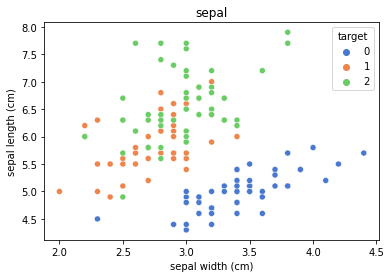

In [ ]:
# 꽃받침에 대한 꽃들의 종류를 시각화
# x축 : 꽃받침의 너비, y축 : 꽃받침의 길이

sns.scatterplot(
    sepal_columns[1],
    sepal_columns[0],
    hue='target',
    palette='muted',
    data=df_iris
)
plt.title('sepal')
plt.show()

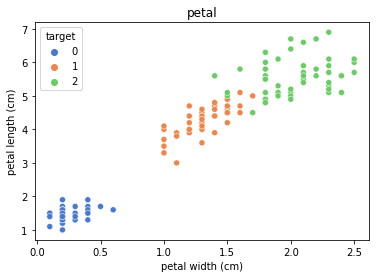

In [ ]:
petal_columns = [df_iris.columns[2], df_iris.columns[3]]
sns.scatterplot(
    petal_columns[1],
    petal_columns[0],
    hue='target',
    palette='muted',
    data=df_iris
)
plt.title('petal')
plt.show()

분산이 크다는 말은 데이터가 보기 편하다?????


# Shuffle & Split
- shuffle : 0, 1, 2 레이블이 순서대로 쭉 나열되어 있는 형태
- split :

In [ ]:
from sklearn.model_selection import train_test_split

# 1. 실제 모젤을 위해서 데이터를 잘라내야 하는 경우
# 1-1. train / test 분할
#1-2 train을 train / vaild로 나눈다

X_train, X_test, y_train, y_test = train_test_split(
    df_iris.drop('target', axis=1),
    df_iris['target'],
    random_state=42
)

# cross_val_score 활용시에는 별로 사용은 안한ㅂ니다
X_train, X_vaild, y_train, y_vaild = train_test_split(
    X_train,
    y_train,
    random_state=42
)
# 시간이 되면 cross vaild가 더 좋다,,,?

* 머신러닝 수업을 들으면서 공부할 거니까 - evaulate가 필요 없다!
* 굳이 valid(또는 test) 세트까지 만들 필요가 없다...


In [ ]:
# 2. 수엉ㅂ 때 사용할 데이터를 잘라내는 경우
X_train, X_vaild, y_train, y_vaild = train_test_split(
    df_iris.drop('target', axis=1),
    df_iris['target'],
    random_state=42
)


In [ ]:
X_train.shape, y_train.shape

((112, 4), (112,))

In [ ]:
X_vaild.shape, y_vaild.shape

((38, 4), (38,))

데이터의 변경이 일어났을 때는 귀찮더라도 데이터 확인하기


# Train / Test 시각화

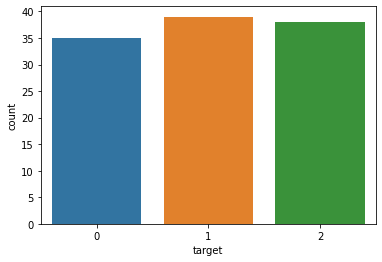

In [ ]:
# 꽃이 50개씩 3종류가 들어감
sns.countplot(y_train)
plt.show() 
# 계층 분할이 안되어 있는 상태..?
# y_vaild도 균등하지 않을 것으로 예상?


Train_test_split의  stratify 옵션을 이용하여 원하는 데이터를 기준으로 계층 분할
- 일반적으로 y의 값을 계층분할????
- 회귀에서는 연속적인 값이기 때문에 feature에 가장 영향을 많이 미치는 값으로 계층 분할을 한다????

- -> 분류에서는 LABEL을 기준으로 계층분할
- -> 회귀에서는 Y에 대한 상관계수가 제일 높은 feature를 기준으로 게층 분할


In [ ]:
X_train, X_vaild, y_train, y_vaild = train_test_split(
    df_iris.drop('target', axis=1),
    df_iris['target'],
    random_state=42,
    stratify=df_iris['target'] # target컬럼의 데이터를 기준으로 계층 분할을 할 것이다.
    )

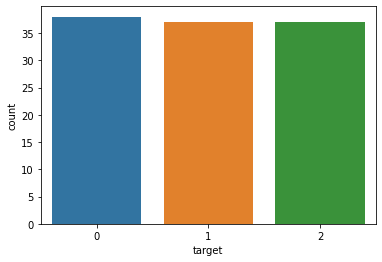

In [ ]:
# 계층 분할 하고 나서 y의 개수 시각화
sns.countplot(y_train)
plt.show()

머신러닝 분류모델 소개
# LogisticRegression
* Regression(회귀) - **회귀**라는 단어가 들어가지만 **분류**모델 입니다.
* **확률 모델**이며, 이진 분류만 가능한 모델
* 예측의 결정을 $\sigma$ (시그모이드) 함수를 사용
  * $\sigma$ 함수의 특징
    * 입력값이 양수 무한대($+\infty$)로 입력이 들어와도 1에 가깝게 출력이 나옴
    * 입력값이 음수 무한대($-\infty$)로 입력이 들어와도 0에 가깝게 출력이 나옴

* `LogisticRegression`, `Support Vector Machine` 과 같은 알고리즘은 이진 분류만 가능
* 3개 이상의 분류 (Multiclass Classification)을 사용할 때는 다음과 같은 두 가지 전략을 사용

  1. **OVR(One Vs Rest)** ,OVA(one vs all)
  * 클래스가 K개가 존재하는 경우 (K는 3 이상) 1개의 클래스를 제외한 다른 클래스를 K개 만들어 각각의 이진 분류를 수행
  * 이진 분류에 대한 확률을 구하고, 그 총합을 통해 최종 클래스를 판별
  * 0번 클래스에 대해서 [1, 2]을 묶어 줍니다 --> 0 vs [1, 2]
  * 1번 클래스에 대해서 [1, 0]을 묶어 줍니다 --> 2 vs [1, 0]
  * 1번 클래스에 대해서 [0, 2] 묶어 줍니다 --> 1 vs [0, 2]

  2. **OVO(One Vs One)**
  * 하나씩 하나씩 비교하는 분류기를 여러 개를 만든다.
  * `0 vs 1`, `0 vs 2`, `1 vs 2`를 하는 분류기를 각각 만들어 준다.
  * `0 vs 1`, `0 vs 2`, `0 vs 3`, `1 vs 2`, `1 vs 3`, `2 vs 3`
  * 분류기 개수 K개의 클래스가 있다고 가정: $K\times \frac{K-1}{2}$ 개의 분류기 생성

**OVR 기법을 더 선호한다**



In [ ]:
from sklearn.linear_model import LogisticRegression


1. 모델 객체 생성

In [ ]:
model = LogisticRegression()

2. 모델 훈련(학습)

In [ ]:
model.fit(X_train, y_train)
# 아래 나오는 구현하는 클래스의 객체

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

3. 예측

In [ ]:
prediction = model.predict(X_vaild)
prediction

array([0, 1, 1, 1, 0, 1, 2, 2, 2, 2, 1, 2, 1, 1, 0, 0, 0, 1, 0, 1, 2, 1,
       2, 1, 2, 1, 0, 2, 0, 2, 2, 2, 0, 0, 0, 0, 2, 1])

4-1. 평가1

In [ ]:
# 정답과 예측을 매칭해서 평균을 구함 (일반적으로 많이 사용하지 않음)
(prediction == y_vaild).mean()

0.9473684210526315

**4-2. 평가2**(score 넣기)

In [ ]:
import numpy as np
import pandas as pd
#model.score(prediction.reshape(-1, 1)) # 시리즈 형태여서 할수 ㅇ없다...?

In [ ]:
model.score(X_vaild, y_vaild) #(예측, 점수) 예측을 하고 거기에 대한 점수까지

0.9473684210526315

# SGDclassifier


**Stochastic Gradient descent** : 확률적 검사 하강법
* Loss(손실)값의 최소 지점을 찾아가는 방식??
* 학습된 모델 파라미터를 손실이 최소화되는 지점으로 갱신하는 방식


In [ ]:
from sklearn.linear_model import SGDClassifier

1. 모델 선언

In [ ]:
sgd = SGDClassifier(random_state=0) # 항상 똑같은 위치에서 경사각?을 수행/?

2. 모델 훈련

In [ ]:
sgd.fit(X_train, y_train)
# 아래 alpha가 러닝 네이트에 영향을 미침 (가중치를 규제)?

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

3. 예측

In [ ]:
prediction = sgd.predict(X_vaild)

In [ ]:
(prediction == y_vaild).mean()

0.7368421052631579

# K-NN (K-Neareast Neighbors) K 최근접 이웃
## KNeighborsClassifier

예측 시 찍힌 데이터 포인트에서 제일 가까운 훈련 데이터가 몇개인지에 따라 분류 되는 알고리즘



In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [ ]:
knn.score(X_vaild, y_vaild)

0.9736842105263158

In [ ]:
# knn의 이웃개수 조절
knn_1 = KNeighborsClassifier(n_neighbors=1)
knn_1.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [ ]:
# 점수 확인하기
print('훈련세트 점수 : {}'.format(knn_1.score(X_train, y_train)))
print('검증세트 점수 : {}'.format(knn_1.score(X_vaild, y_vaild)))

훈련세트 점수 : 1.0
검증세트 점수 : 0.9473684210526315


# 서포트 벡터 머신(Support Vector Machine)
## SupportVectorClassifier
* 새로운 데이터가 어느 카테고리에 속할지 판단하는 **비효율적** 이진 선형 분류 모델
* 클래스 끼리의 경계로 표현되는 데이터를 가장 큰 폭을 가진 경계를 찾는 알고리즘


## Support Vesctor
결정 경계를 만들기 위해 결정ㅈ적인 역할을 하는 가장자리에 있는 **데이터 포인트**
* 클래스와 클래스 사이에 선을 긋기 위한 서로의 서포트 벡터가 존재
* 서포트 벡터와 서포트 벡터 사이의 거리를 마진(margin)

In [ ]:
from sklearn.svm import SVC

In [ ]:
svc = SVC(random_state=0)
svc.fit(X_train, y_train)
# 아래 c는 규제라는 매개변수??c값이 높아지면...데이터 포인터들을 더 신경쓴다?? 복잡도가 높아진다.
# gamma는 마진 폭을 결정해준다, 감마와 폭은 역수이다.

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

In [ ]:
svc.score(X_train, y_train)

0.9732142857142857

In [ ]:
svc.score(X_vaild, y_vaild)

0.9210526315789473

## Decision Tree (의사결정 나무)
스무고개처엄, 나무가지치기를 이용해 소그룹으로 나누어 판별

In [ ]:
# 데이터들을 패턴 설명하기 쉽다.?
from sklearn.tree import DecisionTreeClassifier


In [ ]:
dt =DecisionTreeClassifier(random_state=0)
dt.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [ ]:
dt.score(X_vaild, y_vaild)

0.9210526315789473

In [ ]:
dt.score(X_train, y_train)

1.0

기본적으로 의사결정 나무는 최대한 과대적합 되어있다.
- 특성을 활용해서 예측했을 대 전문가가 된다???
- 설명하기가 좋다??


In [ ]:
# 설명을 하기 위한시각화
from sklearn.tree import export_graphviz
from subprocess import call

In [ ]:
from IPython.display import Image

def graph_tree(model):
    # .dot 파일로 export(내보내기)
    export_graphviz(model, out_file='tree.dot')

    # .dot 파일을 png 파일로 변환
    call(['dot', '-Tpng', 'tree.dot', '-o', 'decistion-tree.png', '-Gdpi=600'])

    # .png출력
    return Image(filename='decistion-tree.png', width=500)

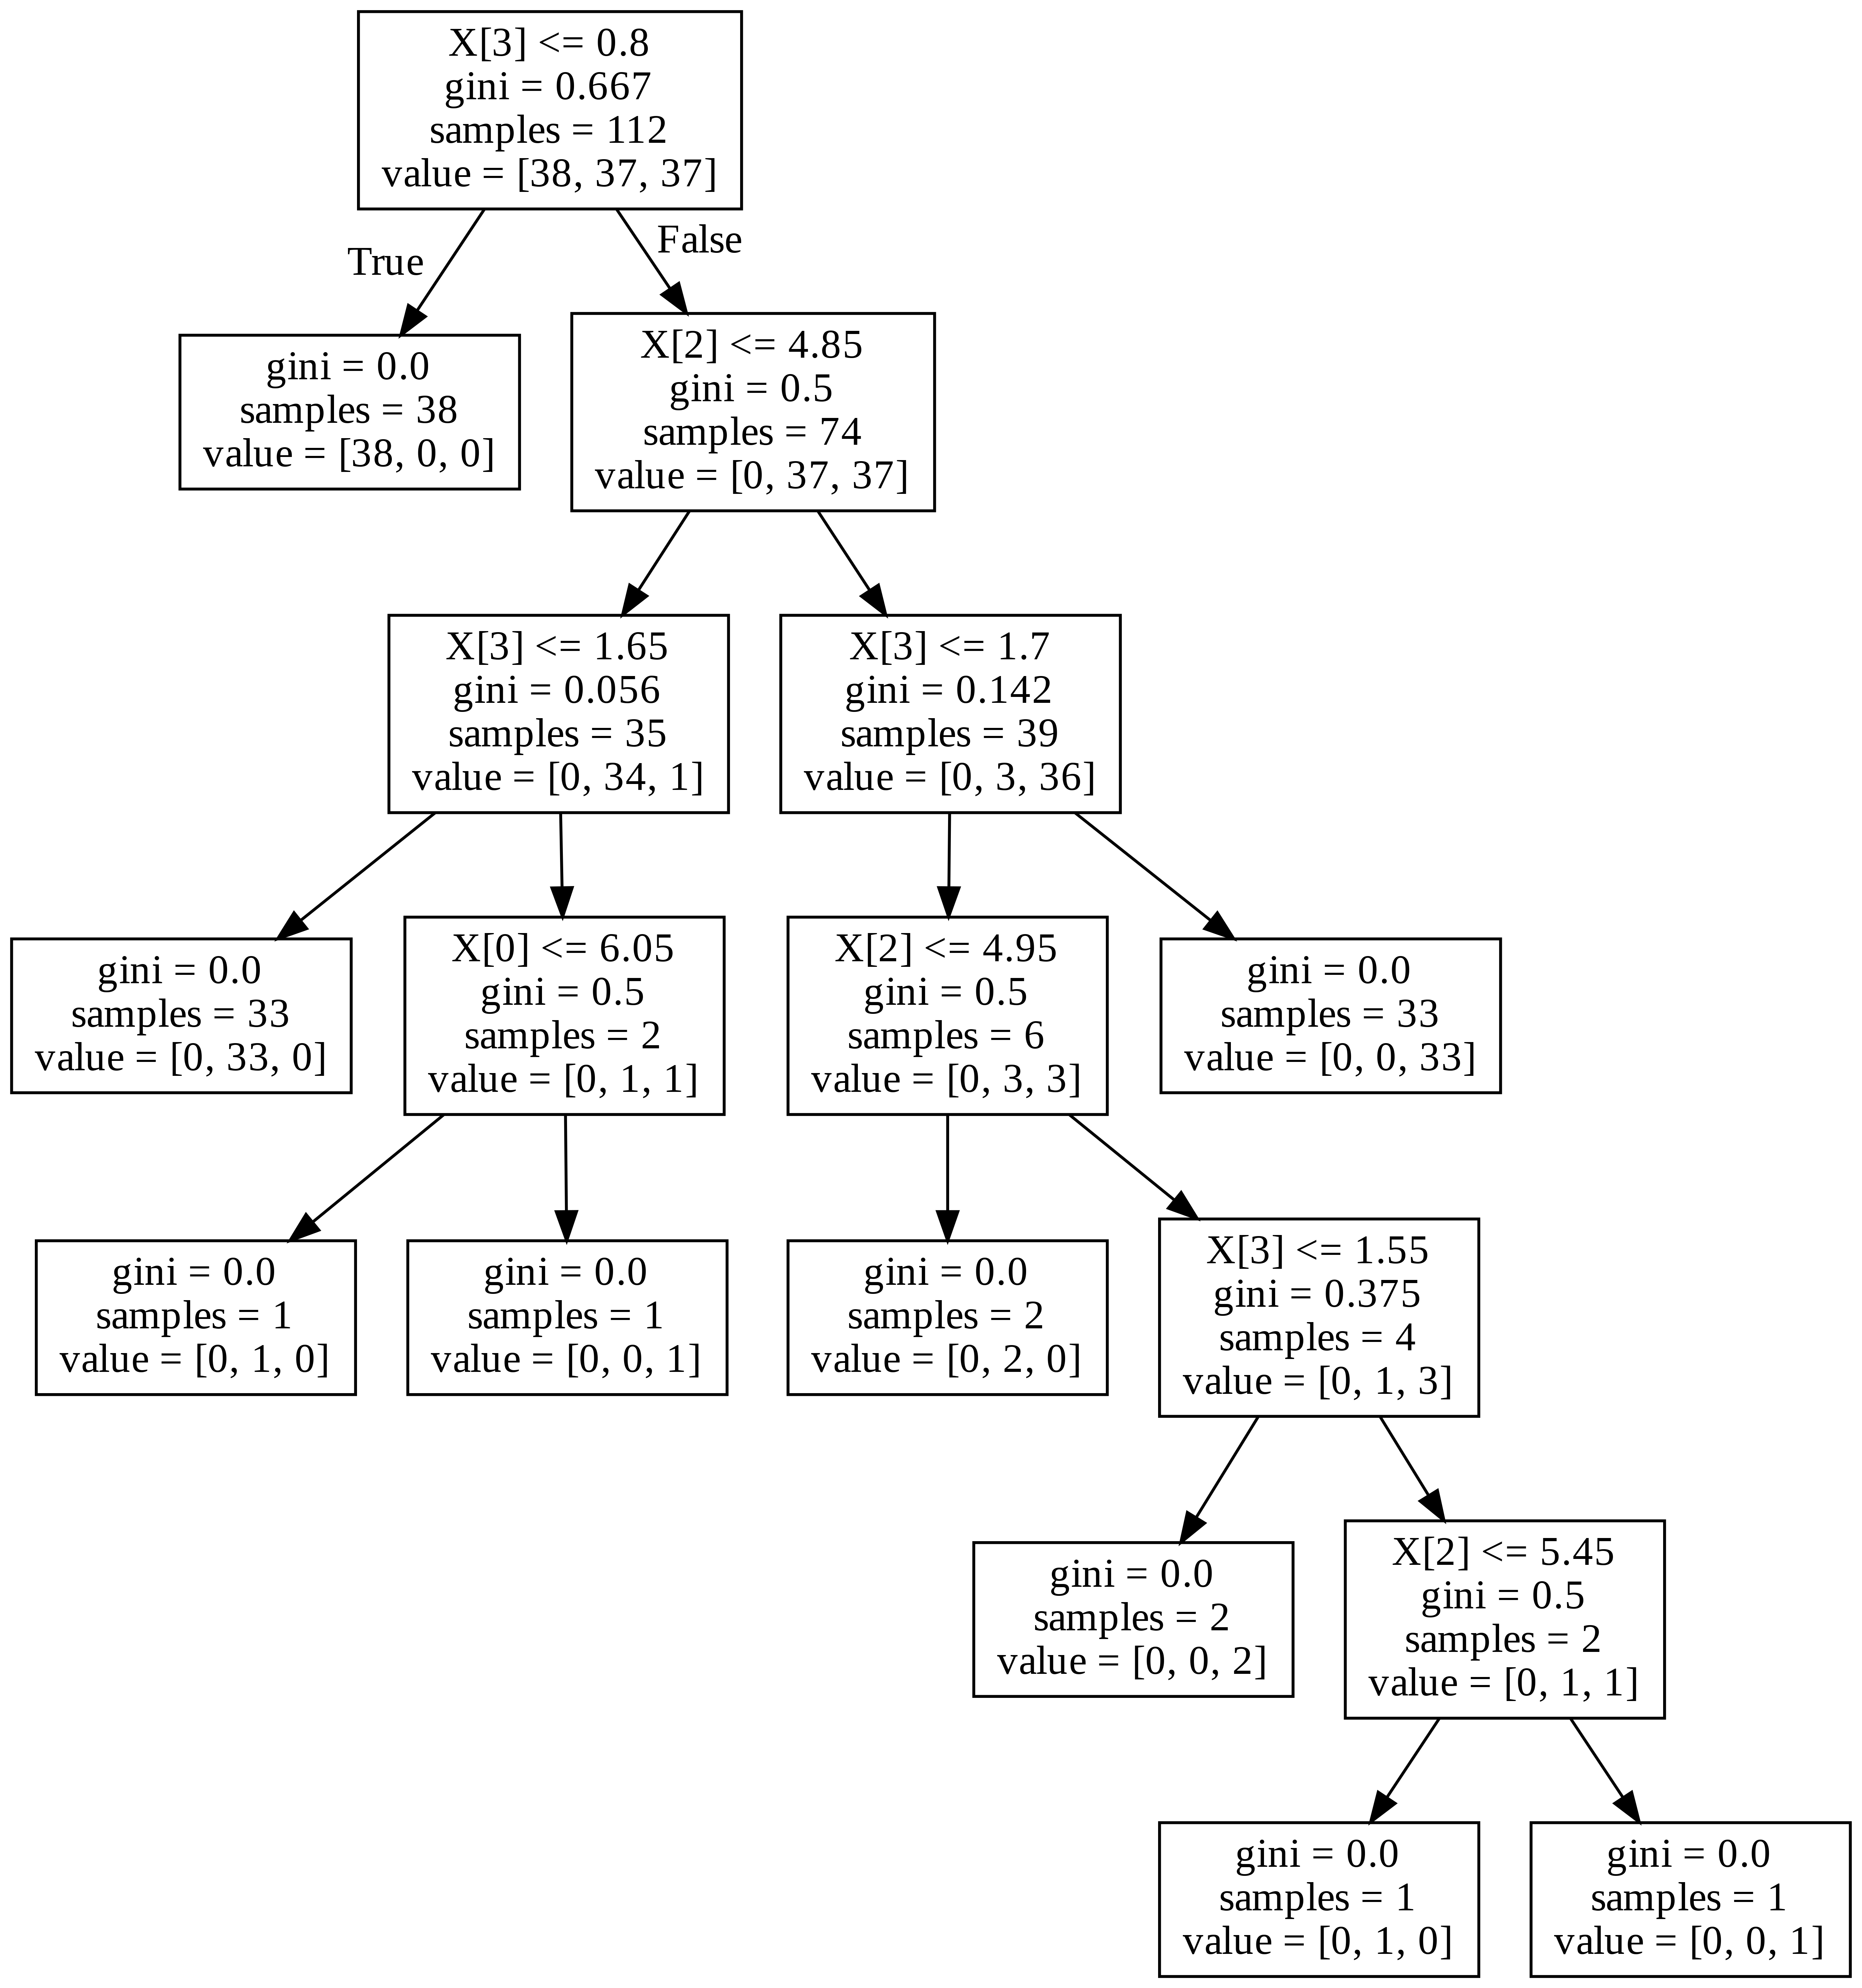

In [ ]:
graph_tree(dt)
# 1번클래스만 있거나 2번 클래스만 있거나 한가지 클래스만 있을 때 멈춘다??
# gini는 가가 클래스 입장에서 높아지면 불평등한 것..

gini 계수
* 불순도를 의미하고, 지니계수가 높을수록 엔트로피가 크다는 것을 의미
* 지니 불순도를 이용해 질문지를 만들어 판단하는 방식

In [ ]:
dt = DecisionTreeClassifier(max_depth=2) #max_depth를 저장하지 않으면 무조건 최대 depth까지 간다
dt.fit(X_train, y_train)
dt.score(X_train, y_train)

0.9642857142857143

In [ ]:
dt.score(X_vaild, y_vaild)

0.9210526315789473

#오차( Error )
 정확도의 함정

In [ ]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
import numpy as np

**target**
 - 악성종양 : 0
 - 양성종양 : 1

In [ ]:
cancer = load_breast_cancer()


In [ ]:
data = cancer['data'] # feature데이터 가져오기
target = cancer['target']
feature_names = cancer['feature_names']

데이터 프러임 만들기

In [ ]:
df = pd.DataFrame(data=data, columns=feature_names)
df['target'] = target

df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [ ]:
# 악성 / 양성 종양 분리
pos = df.loc[df['target'] == 1] # 양성 종양 가져오기
neg = df.loc[df['target'] == 0] # 양성 종양 가져오기

In [ ]:
neg

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
563,20.92,25.09,143.00,1347.0,0.10990,0.22360,0.31740,0.14740,0.2149,0.06879,0.9622,1.0260,8.758,118.80,0.006399,0.04310,0.07845,0.02624,0.02057,0.006213,24.29,29.41,179.10,1819.0,0.1407,0.4186,0.6599,0.2542,0.2929,0.09873,0
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1.1760,1.2560,7.673,158.70,0.010300,0.02891,0.05198,0.02454,0.01114,0.004239,25.45,26.40,166.10,2027.0,0.1410,0.2113,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,0.7655,2.4630,5.203,99.04,0.005769,0.02423,0.03950,0.01678,0.01898,0.002498,23.69,38.25,155.00,1731.0,0.1166,0.1922,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,0.4564,1.0750,3.425,48.55,0.005903,0.03731,0.04730,0.01557,0.01318,0.003892,18.98,34.12,126.70,1124.0,0.1139,0.3094,0.3403,0.1418,0.2218,0.07820,0


In [ ]:
pos

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
19,13.540,14.36,87.46,566.3,0.09779,0.08129,0.06664,0.047810,0.1885,0.05766,0.2699,0.7886,2.058,23.560,0.008462,0.014600,0.02387,0.013150,0.01980,0.002300,15.110,19.26,99.70,711.2,0.14400,0.17730,0.23900,0.12880,0.2977,0.07259,1
20,13.080,15.71,85.63,520.0,0.10750,0.12700,0.04568,0.031100,0.1967,0.06811,0.1852,0.7477,1.383,14.670,0.004097,0.018980,0.01698,0.006490,0.01678,0.002425,14.500,20.49,96.09,630.5,0.13120,0.27760,0.18900,0.07283,0.3184,0.08183,1
21,9.504,12.44,60.34,273.9,0.10240,0.06492,0.02956,0.020760,0.1815,0.06905,0.2773,0.9768,1.909,15.700,0.009606,0.014320,0.01985,0.014210,0.02027,0.002968,10.230,15.66,65.13,314.9,0.13240,0.11480,0.08867,0.06227,0.2450,0.07773,1
37,13.030,18.42,82.61,523.8,0.08983,0.03766,0.02562,0.029230,0.1467,0.05863,0.1839,2.3420,1.170,14.160,0.004352,0.004899,0.01343,0.011640,0.02671,0.001777,13.300,22.81,84.46,545.9,0.09701,0.04619,0.04833,0.05013,0.1987,0.06169,1
46,8.196,16.84,51.71,201.9,0.08600,0.05943,0.01588,0.005917,0.1769,0.06503,0.1563,0.9567,1.094,8.205,0.008968,0.016460,0.01588,0.005917,0.02574,0.002582,8.964,21.96,57.26,242.2,0.12970,0.13570,0.06880,0.02564,0.3105,0.07409,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
558,14.590,22.68,96.39,657.1,0.08473,0.13300,0.10290,0.037360,0.1454,0.06147,0.2254,1.1080,2.224,19.540,0.004242,0.046390,0.06578,0.016060,0.01638,0.004406,15.480,27.27,105.90,733.5,0.10260,0.31710,0.36620,0.11050,0.2258,0.08004,1
559,11.510,23.93,74.52,403.5,0.09261,0.10210,0.11120,0.041050,0.1388,0.06570,0.2388,2.9040,1.936,16.970,0.008200,0.029820,0.05738,0.012670,0.01488,0.004738,12.480,37.16,82.28,474.2,0.12980,0.25170,0.36300,0.09653,0.2112,0.08732,1
560,14.050,27.15,91.38,600.4,0.09929,0.11260,0.04462,0.043040,0.1537,0.06171,0.3645,1.4920,2.888,29.840,0.007256,0.026780,0.02071,0.016260,0.02080,0.005304,15.300,33.17,100.20,706.7,0.12410,0.22640,0.13260,0.10480,0.2250,0.08321,1
561,11.200,29.37,70.67,386.0,0.07449,0.03558,0.00000,0.000000,0.1060,0.05502,0.3141,3.8960,2.041,22.810,0.007594,0.008878,0.00000,0.000000,0.01989,0.001773,11.920,38.30,75.19,439.6,0.09267,0.05494,0.00000,0.00000,0.1566,0.05905,1


양성황자 357개 몽땅 + 악성 환자 5개

In [ ]:
sample = pd.concat([pos, neg[:5]], sort=True)

In [ ]:
sample.tail()

,area error,compactness error,concave points error,concavity error,fractal dimension error,mean area,mean compactness,mean concave points,mean concavity,mean fractal dimension,mean perimeter,mean radius,mean smoothness,mean symmetry,mean texture,perimeter error,radius error,smoothness error,symmetry error,target,texture error,worst area,worst compactness,worst concave points,worst concavity,worst fractal dimension,worst perimeter,worst radius,worst smoothness,worst symmetry,worst texture
0,153.40,0.04904,0.01587,0.05373,0.006193,1001.0,0.27760,0.14710,0.3001,0.07871,122.80,17.99,0.11840,0.2419,10.38,8.589,1.0950,0.006399,0.03003,0,0.9053,2019.0,0.6656,0.2654,0.7119,0.11890,184.60,25.38,0.1622,0.4601,17.33
1,74.08,0.01308,0.01340,0.01860,0.003532,1326.0,0.07864,0.07017,0.0869,0.05667,132.90,20.57,0.08474,0.1812,17.77,3.398,0.5435,0.005225,0.01389,0,0.7339,1956.0,0.1866,0.1860,0.2416,0.08902,158.80,24.99,0.1238,0.2750,23.41
2,94.03,0.04006,0.02058,0.03832,0.004571,1203.0,0.15990,0.12790,0.1974,0.05999,130.00,19.69,0.10960,0.2069,21.25,4.585,0.7456,0.006150,0.02250,0,0.7869,1709.0,0.4245,0.2430,0.4504,0.08758,152.50,23.57,0.1444,0.3613,25.53
3,27.23,0.07458,0.01867,0.05661,0.009208,386.1,0.28390,0.10520,0.2414,0.09744,77.58,11.42,0.14250,0.2597,20.38,3.445,0.4956,0.009110,0.05963,0,1.1560,567.7,0.8663,0.2575,0.6869,0.17300,98.87,14.91,0.2098,0.6638,26.50
4,94.44,0.02461,0.01885,0.05688,0.005115,1297.0,0.13280,0.10430,0.1980,0.05883,135.10,20.29,0.10030,0.1809,14.34,5.438,0.7572,0.011490,0.01756,0,0.7813,1575.0,0.2050,0.1625,0.4000,0.07678,152.20,22.54,0.1374,0.2364,16.67


In [ ]:
X_train, X_valid, y_train, y_valid = train_test_split(
    sample.drop('target', axis=1),
    sample['target'],
    random_state=42
)

모델 정의 및 학습

In [ ]:
model = LogisticRegression()
model.fit(X_train, y_train)

pred = model.predict(X_valid)

모델이 예측한 정확도 확인

In [ ]:
( pred == y_valid).mean()

0.978021978021978

만약 돌팔이 의사가 모두 양성이라 한다면..


In [ ]:
# 모두 양성으로 나옴
bad_prediction = np.ones(shape=y_valid.shape)
bad_prediction

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1.])

In [ ]:
(bad_prediction == y_valid).mean()

# --> 정확도(accuracy)만 보고 성능을 판단하는 것은 광장히 위험

0.989010989010989

# 오차행렬

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
confusion_matrix(y_valid, pred)

array([[ 1,  0],
       [ 2, 88]])

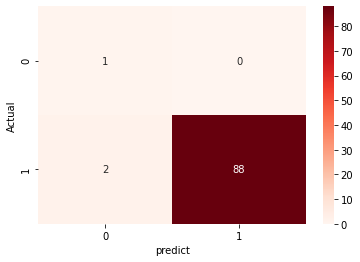

In [ ]:
sns.heatmap(
    confusion_matrix(y_valid, pred),
    annot=True,
    cmap='Reds'

)
plt.xlabel('predict')
plt.ylabel('Actual')
plt.show()

## 정밀도 (precision)
양성 예측 정확도(양성으로 잘못 분류된 걸 기준으로)

TP / (TP + FP)


In [ ]:
from sklearn.metrics import precision_score

precision_score(y_valid, pred) # 모델의 양성 예측 정확도 (정밀도)

1.0

In [ ]:
precision_score(y_valid, bad_prediction) # 돌팔이의 양성 예측 정확도

0.989010989010989

## 재현율 (recall)
- 민감도(sensitivity), TPR(true positive )


In [ ]:
from sklearn.metrics import recall_score

recall_score(y_valid, pred)

0.9777777777777777

In [ ]:
88 / (88 + 2)

0.9777777777777777

In [ ]:
recall_score(y_valid, bad_prediction)

1.0

정밀도와 재현율은 반비례/?한다


# f1 score


정밀도와 재현율의 **조화평균**을 나타내는 지표

In [ ]:
from sklearn.metrics import f1_score

In [ ]:
f1_score(y_valid, pred)

0.9887640449438202

In [ ]:
f1_score(y_valid, bad_prediction)

0.994475138121547

정밀도와 재현율이 비슷한 분류기에서는 f1_score가 높습니다...
 

----
어린아이에게 안전한 동영상을 걸러내는 모델을 만들어야 해요
* 나쁜 동영상을 음성 (0)
* 좋은 동영상을 양성 (1)
1. **나쁜 동영상이 노출** 되는것 보다. : 음성을 양성으로 판단 :  FP가 높아지는것 보다 : **높은 정밀도**를 구축하자
2. **좋은 동영상이 제외** 되는 것을 선호 : 양성을 음성으로 판단 : FN이 높아지는 것 : **낮은 재현율**

결론적으로 높은 정밀도를 목표로 삼아야한다